# Python and IPython Introductory Reference

# Table of Contents
1. [IPython Extensions](#Ipython-Extensions) - tools to enhance your Jupyter/IPython experience.
1. [Importing](#Importing) - don't write all your code yourself, usually someone else has a faster more robust tool (e.g. numpy).
1. [Native Python Concepts](#Basic-Python-Types-and-Concepts)
    1. [Numeric Types](#Numeric-Types-(int,-scalars-of-various-types-non-exhaustive))
    1. [Null Type](#Null-Type-(None)) - nothing is its own thing.
    1. [Text Type](#Text-Type-(Strings))
        1. [Strings Can Do Things To Themselves...what is an 'object' anyway?](#Strings-also-have-a-bunch-of-things-that-they-can-"do"-to-themselves...What-is-an-'object'-anyway?)
    1. [Logical Types](#Logical-Types-(True,-False,-bool))
        1. [Equality vs. Identity](#Equality-vs.-Identity) - when are things the same?
        1. [Using Logicals with'if' and 'while'](#Using-Logicals-with-if-and-while) - Simple [control flow][ln_control_flow_docs].
    1. [Sequence (list, tuple, range)](#Sequence-(list,-tuple,-range)) - useful for holding multiples of types from above.
        1. [Not all sequences can be altered](#Not-all-sequences-can-be-altered) - mutable? immutable?
        1. ['if' and 'while' with sequences](#if-and-while-with-sequences) - more control flow.
        1. ['for' Looping with sequences](#Looping-with-sequences) - do a thing multiple times.
    1. [Defining new functions in python](#Defining-new-functions-in-python)
1. [Numpy](#Numpy)
    1. [Defining new data arrays](#Defining-New-Data-Arrays)
    1. [Basic 'np.ndarray()' properties](#Basic-'ndarray'-properties)
    1. [ndarray Methods](#ndarray-methods)
        1. ['axis' parameter](#'axis'-parameter)
    1. [Array multiplication](#Array-multiplication)
        1. [Matrix 'powers', beware!](#Matrix-'powers',-beware!) -- what does it mean to take a matrix to a power?
    1. [Element-wise Multiplication](#Element-wise-Multiplication)
    1. [Broadcasting](#Broadcasting) - simple operations between mismatched dimensions (e.g. `vector * scalar`).
    1. [Indexing](#indexing)
        1. [Masking](#Masking)
    1. [Reshape arrays](#Reshape-np.arrays)
1. [Plotting with matplotlib.pyplot](#Plotting-with-matplotlib.pyplot)
---
---

[ln_control_flow_docs]: https://docs.python.org/3/tutorial/controlflow.html

# Ipython Extensions

Primarily, **ipython** is a command line tool `$ ipython # rather than
python` that has many nice default features. IPython also encompasses the
**jupyter** project (this notebook is running in `jupyter notebook`). As a
result many of the very nice [**ipython extensions**][ln_ipe] are helpful in jupyter.

```python
%load_ext <extension_name> # makes the extension available
```


---

`autoreload` is one of the most useful extensions for working local packages.
The `autoreload 2` mode means that your imported packages will be
refreshed from source whenever a cell is run. If your notebook references
modules that are changing (e.g. you are developing a function) you need to
use this extension for jupyter to utilize the most recent save point. 
Without this extension you would have to define all custom code
inside the notebook, or restart the kernel and import (again and again) every time you
alter the imported code.

[ln_ipe]: https://ipython.readthedocs.io/en/stable/config/extensions/index.html

In [1]:
%load_ext autoreload
%autoreload 2

# Importing

With **pip** we decide
which tools we'd like in our "workshop", but it is `import`-ing that spins
the tools up in the current working environment.

When you import you reference **packages** and **modules**. 
In python **packages** contain **modules** (files with the `.py` extension).
Modules are composed of **functions** and **classes**.

```python
# example imports
import package # simple import
import long_package_name as cute_name # import and rename for convenience
from another_package.supermodule import submodule as sm # a module, not the whole package
from final_example_package import module1, module2 # grab a few modules at once
```
---
Please be reasonable and consistent when you customize and abbreviate in import
statements... 

<div align="center">
<img src="./media/import_alignment_theo_oneill.jpeg" width="300" height="300" title="Found on twitter by Theo ONeill"/>
</div>

In [2]:
import os
import sys

import numpy as np 
import numpy.random as npr
import matplotlib.pyplot as plt

from ouroboros.utilitarian_module_name import twoDvectors as tdvec_plot # <-- single 'function' import example

In [3]:
print(sys.executable, "<-- The python associated with this kernel.")

/Users/tgfisher/we_sick/bin/python3.9 <-- The python associated with this kernel.


# Basic Python Types and Concepts
---
---

We can't cover all python types, but this section provides a tour of the key
players. If all this is new to you and you'd like pointers for learning coding
basics, please let us know. We are happy to help. 

Numeric, Logic, Null, Text, Sequence are all families of default types in
python. As we learn about these types we will also show how they interact with
common control flow operators like `if`, `for`, and `while`.

Run the cells below each titled-block to experience them.


## Numeric Types (int, scalars of various types _non-exhaustive_)

**print()** is a common way to expose variables to the user.


In [4]:
integer_var = 12
float_var = 12.0
complex_var = 3+2j
print(integer_var)
print(float_var)
print(complex_var)

12
12.0
(3+2j)


## Null Type (None)

In [5]:
simple_none_val = None
print_none_val = print("print is a function that doesn't return a value?")
print(simple_none_val)
print(print_none_val, "<-- yep, I guess so. Any function w/o a `return` will 'return' None.")

print is a function that doesn't return a value?
None
None <-- yep, I guess so. Any function w/o a `return` will 'return' None.


## Text Type (Strings)
The **"f" string** can be used to evaluate little bits of code inside "\{ \}"
withing the string. 

```python
print(f"<some string>{<some_code_to_evaluate>}<more string>")`
```

In [6]:
numbers_string_var = f"my integer: {integer_var}\nmy float: {float_var}\nmy complex: {complex_var}"

getting_a_bit_extra = (
    numbers_string_var +
    f"\nDon't know why you'd want this, but here is a sum: {integer_var + float_var + complex_var}"
) # using () to split things across lines is nice for readability

print(numbers_string_var)
print("\n\t-----Getting Extra Below-----\n")
print(getting_a_bit_extra)
print("\t\t\t\t\t\t\t^ Interesting to see what type was inherited (complex).")

my integer: 12
my float: 12.0
my complex: (3+2j)

	-----Getting Extra Below-----

my integer: 12
my float: 12.0
my complex: (3+2j)
Don't know why you'd want this, but here is a sum: (27+2j)
							^ Interesting to see what type was inherited (complex).


### Strings also have a bunch of things that they can "do" to themselves...What is an 'object' anyway?
---
_This is a good time for a small aside..._ in the cell below we will show you
examples where a string is utilized as an 'object'.

_What is an object?_ You may have heard that Python is an "object oriented"
language. You might even hear people bashing Matlab because it isn't. What does
it mean to be object oriented?

Briefly, an object can "do" things and keep track of things related to itself.
For example, we can model a bouncing ball in (1) a 'functional' way or (2) an
'object oriented' way:

1. We can have a variable holding the height of a ball, and a function taking
   in the bounciness of the ball and "bouncing physics" in order to model a
   bounce.

```python
start_height = 10 # feet
start_velocity = 0 # meters/sec
bouncyness = .9 # rebound efficiency (out of 1)
height_over_time = bounce_physics(start_height, start_velocity, bouncyness)
```

1. We can write a ball 'object' that holds all of its own information.

```python
start_height = 10
ball.set_bouncyness(.9)
ball.drop_from_ft(10)
height_over_time = ball.bounce_from(start_height)
```

The key is that each thing in python is an 'object' and can have built in
'methods' to alter itself or hold functions to alter other things.

_A note on the Matlab-Python debate: object oriented code can be written in
Matlab, and many people write 'functional' mega-scripts/notebooks in python 
anyway, so... you decide._

In [7]:
ugly_sentence = "U.g.L.y._YoU_ainT_gOT_nO_AliBy!"
print(ugly_sentence.split("_"))

['U.g.L.y.', 'YoU', 'ainT', 'gOT', 'nO', 'AliBy!']


In [8]:
print(ugly_sentence)
print(" ".join(ugly_sentence.split("_")))

U.g.L.y._YoU_ainT_gOT_nO_AliBy!
U.g.L.y. YoU ainT gOT nO AliBy!


In [9]:
pretty_sentence = " ".join(ugly_sentence.split("_")).capitalize()
print(pretty_sentence)

U.g.l.y. you aint got no aliby!


## Logical Types (True, False, bool)

Logical types are about "yes"/"no", "true"/"false", or "hide"/"show". 

In [10]:
true_var = True
false_var = False
print(true_var)
print(false_var)

True
False


In [11]:
two = 2
too = 2.0

print("----Equality----")
print(two == too)
print(two != too)
print("----Identity----")
print(two is too)
print(two is not too)
print("\nO_o ... wut?")

----Equality----
True
False
----Identity----
False
True

O_o ... wut?


### Equality vs. Identity 
--- 
When we are asking if something "is the same as
something else" what do we mean?

Variables are stored in memory on your computer. The `is` operator tells us if
two variables reference the same place in memory, a.k.a. they are just two
names for the 'same thing'. The `==` operator asks if the two things are
equivalent. One apple might look the same, taste the same, and have the same
effect, but they don't share the same space.

Equality has a few subtleties:
1. Numeric variables (as shown above).
1. Strings.
2. There is only one "None".
3. Two identical lists don't necessarily share the same space.

In [12]:
"""
This block was written to illustrate that code run from withing an REPL or Jupyter
differs from running code from within a script. Please use `==` when
you wish to evaluate equality. Reserve `is` for comparing identity.
"""

tucker_says = "hi there!"
compiler_says = "hi" + " there!"
tucker_responds = "bye."

print_returns_none = print("strings can be tricky")
print("\t", tucker_says == compiler_says, "\t(tucker_says == compiler_says)")
print("\t", tucker_says is compiler_says, "\t(tucker_says is compiler_says)")

print("\t", tucker_responds == "bye.", '\t(tucker_responds == "bye.")')
print("\t", tucker_responds is "bye.", '\t(tucker_responds is "bye.")') # <-- python might warn you

another_none_return = print("there is only one `None`")

print("\t", print_returns_none is another_none_return, "(print_returns_none is another_none_return)")
print("\t", print_returns_none == another_none_return, "(print_returns_none == another_none_return)")

print("lists are tricky")
print("\t", [1] == [1], "\t([1] == [1])")
print("\t", [1] is [1], "\t([1] is [1])")

my_list = [1]
new_name_same_list = my_list
print("\t", my_list is new_name_same_list, "\t(my_list is new_name_same_list)")
print("\t", my_list is my_list.copy(), "\t(my_list is my_list.copy())")

strings can be tricky
	 True 	(tucker_says == compiler_says)
	 False 	(tucker_says is compiler_says)
	 True 	(tucker_responds == "bye.")
	 False 	(tucker_responds is "bye.")
there is only one `None`
	 True (print_returns_none is another_none_return)
	 True (print_returns_none == another_none_return)
lists are tricky
	 True 	([1] == [1])
	 False 	([1] is [1])
	 True 	(my_list is new_name_same_list)
	 False 	(my_list is my_list.copy())


<>:16: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:16: SyntaxWarning: "is" with a literal. Did you mean "=="?
/var/folders/t7/54t2fmhd58sgbc8v10k4dx1r0000gn/T/ipykernel_39961/1192173018.py:16: SyntaxWarning: "is" with a literal. Did you mean "=="?
  print("\t", tucker_responds is "bye.", '\t(tucker_responds is "bye.")') # <-- python might warn you


In [13]:
print("-------Run File-------")
%run ../bin/wish_you_knew.py

-------Run File-------
strings can be tricky
	 True 	(tucker_says == compiler_says)
	 True 	(tucker_says is compiler_says)
	 True 	(tucker_responds == "bye.")
	 True 	(tucker_responds is "bye.")
there is only one `None`
	 True (print_returns_none is another_none_return)
	 True (print_returns_none == another_none_return)
lists are tricky
	 True 	([1] == [1])
	 False 	([1] is [1])
	 True 	(my_list is new_name_same_list)
	 False 	(my_list is my_list.copy())


/Users/tgfisher/local_repos/ouroboros/bin/wish_you_knew.py:16: SyntaxWarning: "is" with a literal. Did you mean "=="?
  print("\t", tucker_responds is "bye.", '\t(tucker_responds is "bye.")') # <-- python might warn you


In [14]:
scary_file = "../bin/wish_you_knew.py"
print("-------Show File Contents-------")
with open(scary_file, "r") as omg:
    file_by_line = omg.read()
print(file_by_line)

-------Show File Contents-------
"""
This block was written to illustrate that code run from withing an REPL or Jupyter
differs from running code from within a script. Please use `==` when
you wish to evaluate equality. Reserve `is` for comparing identity.
"""

tucker_says = "hi there!"
compiler_says = "hi" + " there!"
tucker_responds = "bye."

print_returns_none = print("strings can be tricky")
print("\t", tucker_says == compiler_says, "\t(tucker_says == compiler_says)")
print("\t", tucker_says is compiler_says, "\t(tucker_says is compiler_says)")

print("\t", tucker_responds == "bye.", '\t(tucker_responds == "bye.")')
print("\t", tucker_responds is "bye.", '\t(tucker_responds is "bye.")') # <-- python might warn you

another_none_return = print("there is only one `None`")

print("\t", print_returns_none is another_none_return, "(print_returns_none is another_none_return)")
print("\t", print_returns_none == another_none_return, "(print_returns_none == another_none_return)")

print("li

### Using Logicals with `if` and `while`
---
`if/elif/else` and `while` are two 'control flow' tools in python. 

1. `if/elif/else` in action:
```python
if <something_not_False_and_not_None>:
    ...this happens
elif <something_else_False_and_not_None>:
    ...this happens, the above was skipped
else:
    ...a different thing happens, both above were skipped
```

2. `while` in action:
```python
while <something_not_False_and_not_None>:
    ...this continues to happen repeatedly
```

Most simply `if/elif/else` and `while` are switches that will allow, or
disallow, the code within to run.

Logical types (`True`, `False`, 0, 1) are most often responsible for controlling the flow of `if` and
`while` statements..._however, other types can also control flow. We will see more later in another section._

In [15]:
a_nothing = None
if a_nothing:
    print("This wont go if a_nothing is None.")
else:
    print("This printed because a_nothing is None.")

This printed because a_nothing is None.


In [16]:
zero = 0
if zero:
    print("This won't go if zero is 0")
elif zero == 0:
    print("This goes off if zero == 0")
else:
    print("Try and make this go off by altering 'zero' variable.")

This goes off if zero == 0


In [17]:
a_num = 10
if a_num:
    print("This goes off if 'not None', 'not 0', and 'not False'")
else:
    print("a_num is iterpreted as a 'False'.")

This goes off if 'not None', 'not 0', and 'not False'


## Sequence (list, tuple, range)

Sequences are very useful for holding a bunch of things in a particular
order. Each kind of sequence has its uses, strengths and weaknesses.

In [18]:
this_is_a_list = numbers_string_var.split("\n")

print(this_is_a_list, end="") # the typical end of a print is "\n", but it doesn't have to be
print(f"\t{type(this_is_a_list)}")

['my integer: 12', 'my float: 12.0', 'my complex: (3+2j)']	<class 'list'>


In [19]:
another_list = [integer_var, float_var, complex_var, 14.7]

print(another_list, end="\t")
print(f"{type(another_list)}")

[12, 12.0, (3+2j), 14.7]	<class 'list'>


In [20]:
this_is_a_tuple = (1,2,3,"4")
another_tuple = 1,2,3,4; # <-- sneaky ; makes a tuple also

print(this_is_a_tuple, end="\t")
print(f"{type(this_is_a_tuple)}")

print(another_tuple, end="")
print(f"\t{type(another_tuple)}")

(1, 2, 3, '4')	<class 'tuple'>
(1, 2, 3, 4)	<class 'tuple'>


In [21]:
start = 1
stop = 4
step_size = 3

this_is_a_range = range(stop)
start_range = range(start, stop)
startstep_range =range(start,stop,step_size) # this function has an optional keyword argument

print(this_is_a_range, end="")
print(f"\t{type(this_is_a_range)}")

print(start_range, end="")
print(f"\t{type(startstep_range)}")

print(startstep_range, end="")
print(f"\t{type(startstep_range)}")

range(0, 4)	<class 'range'>
range(1, 4)	<class 'range'>
range(1, 4, 3)	<class 'range'>


### Not all sequences can be altered
---
When something can't be altered we call it "immutable". Tuples are an example
of an immutable object.

_Below is an example of a **try, catch** statement. These are great ways to manage
expected errors. The more specific you are with the exception you are excepting
the better._

In [22]:
try: # changing the first item in a list
    this_is_a_list[0] = "I'm a change"
    print(this_is_a_list)
except TypeError as e:
    print("Whoa, it won't let me do that because {e}")

["I'm a change", 'my float: 12.0', 'my complex: (3+2j)']


In [23]:
try: # changing the last item of a tuple
    this_is_a_tuple[-1] = "I'm a change"
    print(this_is_a_tuple)
except TypeError as e:
    save_the_error_for_later = e
    print(f"Whoa, it won't let me do that because the {e}.")

Whoa, it won't let me do that because the 'tuple' object does not support item assignment.


In [24]:
#raise save_the_error_for_later # if you want, take a look at the error we produced.

### `if` and `while` with sequences
---
Lists, Tuples and Ranges also can impact drive control flow with `if` and `while`.

In [25]:
empty_sequence = range(0)
if empty_sequence:
    print("This shouldn't print with an empty sequence.")
else:
    print("An 'empty' sequence is like a False to the `if` operator.")

An 'empty' sequence is like a False to the `if` operator.


### Looping with sequences
---
We can loop over many of the types of variables we've explored above. The `for`
loop is another type of 'control flow'. It can be applied when we wish to loop
through various things in a sequence or only loop for a limited number of repeats.

_The function `clean_looper()` is defined using `def <function_name>:` syntax
so that the next cell looks cleaner (and you see a function definition in
action)._

## Defining new functions in python

Functions are defined using the `def` operator.

```python
def <my_function_name>(<inputs_to_your_function>): # functions don't need to take inputs
    ...body of function
    return <something> # not all functions return values
```

Functions can be defined using the `lambda` operator.

```python
<some_function_handle> = lambda <inputs>: ...something
```

In [26]:
def clean_looper(iterable):
    last_thing = iterable[-1]
    for thing in iterable[:-1]:
        print(thing, end = ", ")
    print(last_thing)
    
# show a lambda function
make_list = lambda stop_at: [val for val in range(stop_at)]
clean_looper(make_list(10))

# loop over our sequences above
clean_looper(start_range)
clean_looper(another_tuple)
clean_looper(pretty_sentence)

0, 1, 2, 3, 4, 5, 6, 7, 8, 9
1, 2, 3
1, 2, 3, 4
U, ., g, ., l, ., y, .,  , y, o, u,  , a, i, n, t,  , g, o, t,  , n, o,  , a, l, i, b, y, !


# Numpy
---
---

Numpy is arguably the most fundamental package for a neuroscientist
interested in writing custom analysis code. Datasets are often 'arrays'
with various dimensions: neurons, time, features, experimental conditions. The
numpy package is the tool for storing, manipulating, and performing fast-ish and
efficient operations on arrays of data.

## Defining New Data Arrays

The **numpy.ndarray** is another object like the 'tuple' or 'list' except
it is an object defined in the numpy package. The ndarray is likely the best
object to hold your data when you intend to do matrix and vector operations.

**np.zeros** and **np.ones** can help initialize an array with repeated values.

In [27]:
taylor = np.array([1.,1.]) # 1-D array, vector
print("taylor:\n", taylor, type(taylor))

swift = np.ones((1,2)) # 2-D array, row vector
print("swift:\n", swift, type(swift))

fearless = np.ones((2))
print("fearless:\n",fearless, type(fearless))

idk_taylor = np.ones((2,1)) * 3
print("idk taylor:\n",idk_taylor, type(idk_taylor))

taylor:
 [1. 1.] <class 'numpy.ndarray'>
swift:
 [[1. 1.]] <class 'numpy.ndarray'>
fearless:
 [1. 1.] <class 'numpy.ndarray'>
idk taylor:
 [[3.]
 [3.]] <class 'numpy.ndarray'>


## Basic 'ndarray' properties

In [28]:
print("shape:",taylor.shape)
print("size:",taylor.size)
print("number of dim:",taylor.ndim)
print("data type:",taylor.dtype) # unlike in lists and tuples, elements share a type

shape: (2,)
size: 2
number of dim: 1
data type: float64


In [29]:
print("shape:",swift.shape)
print("size:",swift.size)
print("number of dim:",swift.ndim)
print("data type:",swift.dtype)

shape: (1, 2)
size: 2
number of dim: 2
data type: float64


In [30]:
print("fearless:\n", fearless)
print("shape:", fearless.shape)

fearless1 = fearless[:,np.newaxis]
print("fearless1:\n",fearless1)
print("shape:", fearless1.shape)

fearless2 = fearless[np.newaxis,:]
print("fearless2:\n", fearless2)
print("shape",fearless2.shape)

fearless:
 [1. 1.]
shape: (2,)
fearless1:
 [[1.]
 [1.]]
shape: (2, 1)
fearless2:
 [[1. 1.]]
shape (1, 2)


In [31]:
type(np.random.rand(1))

numpy.ndarray

## ndarray methods
yup... instances of numpy.ndarray are objects with methods. These are a few pretty convenient ones.

In [32]:
guitar = np.array([[1,2],[3,4]])
print(guitar)
print(guitar.sum())
print(guitar.cumsum()) # cumulative sum
print(guitar.max())
print(guitar.argmax())
print(guitar.min())
print(guitar.argmin())
print(guitar.mean())
print(guitar.std()) # standard deviation
print(guitar.reshape((4,1)))
print(guitar)

[[1 2]
 [3 4]]
10
[ 1  3  6 10]
4
3
1
0
2.5
1.118033988749895
[[1]
 [2]
 [3]
 [4]]
[[1 2]
 [3 4]]


### 'axis' parameter
---

Many numpy operations allow the user to specify which axis to operate between.
Once the operation has been applied between a certain axis (or dimension) it
has effectively been collapsed into a singleton dimension. Numpy will by default
disappear singleton dimensions to simplify the array.

```python
# keeping dims is possible
np.sum(<your_array>, axis=<dim>, keepdims=True)

# also possible with array methods
<your_array>.sum(axis=<dim>, keepdims=True)
```

Consider if you had a matrix and you wanted to 'sum the columns' vs. 'sum the
rows'. `np.sum(ur_mat, axis=<dim>)` can take care of either situation with the
**axis parameter**.

In [33]:
print("guitar has shape", guitar.shape, "\n",guitar)
wonderland = guitar[:,np.newaxis]
print("wonderland has shape", wonderland.shape, "\n",wonderland)
print("\n\t-----summing axis parameter examples------\n")
print("summing guitar with axis = 0: (sum between rows)\n",np.sum(guitar,axis=0))
print(
    "summing guitar with axis = 0: (sum between rows, keeping dims **not common**)\n",
    np.sum(guitar,axis=0, keepdims=True)
)
print("summing guitar with axis = 1: (sum between columns)\n",guitar.sum(axis=1))
print(
    "summing guitar with axis = 1: (sum between columns, keeping dims **not common**)\n",
    np.sum(guitar,axis=1, keepdims=True)
)
print("")
print("summing wonderland with axis = 0:\n",np.sum(wonderland,axis=0))
print("summing wonderland with axis = 1:\n",np.sum(wonderland,axis=1))

guitar has shape (2, 2) 
 [[1 2]
 [3 4]]
wonderland has shape (2, 1, 2) 
 [[[1 2]]

 [[3 4]]]

	-----summing axis parameter examples------

summing guitar with axis = 0: (sum between rows)
 [4 6]
summing guitar with axis = 0: (sum between rows, keeping dims **not common**)
 [[4 6]]
summing guitar with axis = 1: (sum between columns)
 [3 7]
summing guitar with axis = 1: (sum between columns, keeping dims **not common**)
 [[3]
 [7]]

summing wonderland with axis = 0:
 [[4 6]]
summing wonderland with axis = 1:
 [[1 2]
 [3 4]]


## Array multiplication

In [34]:
speak = np.array([[2,3],[4,5]])
red = np.matmul(speak,fearless1) # equivalent to np.dot but don't use this
print("speak:\n",speak)
print("fearless1:\n",fearless1)
print("red:\n",red)

speak:
 [[2 3]
 [4 5]]
fearless1:
 [[1.]
 [1.]]
red:
 [[5.]
 [9.]]


In [35]:
print(fearless1)

[[1.]
 [1.]]


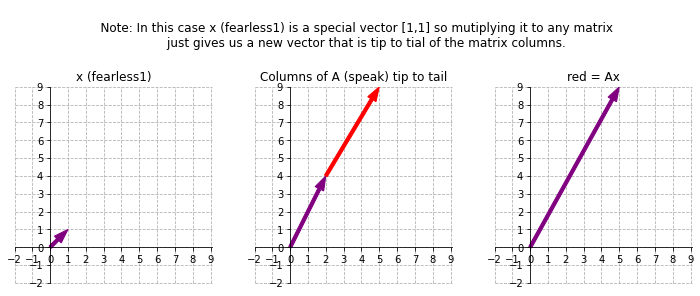

In [36]:
# Applying new names so that the Linear algebra shines through in the plotted example
A = speak
x = fearless1

axis_lim = (-2,9)
vector_fig, vector_axes = plt.subplots(ncols=3, figsize=(10,4), constrained_layout=True)
fearless_fig = tdvec_plot(fearless1, axis_lim, axes_handle=vector_axes[0])
vector_axes[0].set_title("x (fearless1)")
vector_axes[0].set_aspect("equal")

speak_fig = tdvec_plot(speak, axis_lim, tip_to_tail=True, axes_handle=vector_axes[1])
vector_axes[1].set_title("Columns of A (speak) tip to tail")
vector_axes[1].set_aspect("equal")

red_fig = tdvec_plot(red, axis_lim, axes_handle=vector_axes[2])
vector_axes[2].set_title("red = Ax")
vector_axes[2].set_aspect("equal")

st_handle = red_fig.suptitle(
    """
    Note: In this case x (fearless1) is a special vector [1,1] so mutiplying it to any matrix 
        just gives us a new vector that is tip to tial of the matrix columns.
    """
)

/var/folders/t7/54t2fmhd58sgbc8v10k4dx1r0000gn/T/ipykernel_39961/213679676.py:1: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  vector_fig.tight_layout() # an alternative to constrained layout can be set using the figure handle


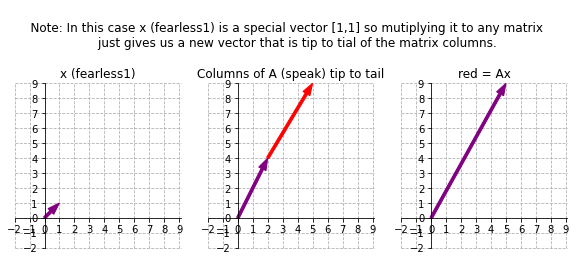

In [37]:
vector_fig.tight_layout() # an alternative to constrained layout can be set using the figure handle
vector_fig # the warning comes because we requested constrained layout at first (you don't need to do that).

In [38]:
red_prime = speak @ fearless1 # equivalent to np.matmul
print("speak:\n",speak)
print("fearless:\n",fearless1)
print("red':\n",red_prime)

speak:
 [[2 3]
 [4 5]]
fearless:
 [[1.]
 [1.]]
red':
 [[5.]
 [9.]]


In [39]:
print("speak:\n",speak)
red1_prime = np.einsum('ij,jk->ik',speak,fearless2) #specify indices for matrix operation
print("fearless2:\n",fearless2)
print("red1':\n",red1_prime)

speak:
 [[2 3]
 [4 5]]
fearless2:
 [[1. 1.]]
red1':
 [[5. 5.]
 [9. 9.]]


### Matrix 'powers', beware!
---
It is important to know exactly how the computer will interpret particular
operations.

`**` operator is the python version of "to the power of": `2**x` is $2^x$.

However, this operator doesn't operate on like it does in common mathematics
syntax.

$A^3$ isn't achieved via `A**3` in python. In fact, `A**3` is element-wise and
is an extension of the Hadamard product ($A\odot A\odot A$).

In [40]:
sing = speak ** 3 
print("sing has shape", sing.shape, "\n",speak)

print(
    (sing == (speak * speak * speak)).all() # equiv. to the Hadamard product of 3 identical matrices
)

print(
    (sing == (speak @ speak @ speak)).all()
)

sing has shape (2, 2) 
 [[2 3]
 [4 5]]
True
False


## Element-wise Multiplication

In [41]:
fearless3 = np.array([[1,1],[1,1]])
red3 = np.multiply(speak,fearless3)
print("speak:\n",speak)
print("fearless3:\n",fearless3)
print("red3:\n",red3)

speak:
 [[2 3]
 [4 5]]
fearless3:
 [[1 1]
 [1 1]]
red3:
 [[2 3]
 [4 5]]


In [42]:
red3_prime = speak * fearless3 # mostly equivalent but be careful
print("speak:\n",speak)
print("fearless3:\n",fearless3)
print("red3:\n",red3_prime)

speak:
 [[2 3]
 [4 5]]
fearless3:
 [[1 1]
 [1 1]]
red3:
 [[2 3]
 [4 5]]


In [43]:
2 * np.array([1,2])

array([2, 4])

In [44]:
np.multiply(2,[1,2])

array([2, 4])

## Broadcasting 

With broadcasting, numpy follows a set of rules (_think_ assumptions) for how "element-wise"
operations between size-mismatched arrays are handled. 

With broadcasting, the user is not responsible for replicating the smaller array 
to match. In certain situations this can make your job easier, for example if 
you would like to add a vector to every column of a matrix. 

In [45]:
fearless_shrink = np.array([[0.5],[0.25]])
print("fearless_shrink has shape", fearless_shrink.shape, "\n",fearless1)
red1 = np.multiply(speak,fearless_shrink) # NOT matrix-vector multiplication, this is "element-wise"
print("speak has shape", speak.shape, "\n", speak)
print("red1 comes from replicating fearless1 and multiplying\n", red1)

fearless_shrink has shape (2, 1) 
 [[1.]
 [1.]]
speak has shape (2, 2) 
 [[2 3]
 [4 5]]
red1 comes from replicating fearless1 and multiplying
 [[1.   1.5 ]
 [1.   1.25]]


In [46]:
fearless = np.array([6, 3])
print("fearless has shape", fearless.shape, "\n",fearless)
print("speak has shape", speak.shape, "\n",speak)
red_tilde = np.multiply(speak,fearless)
print("red_tilde comes from replicating fearless and multiplying\n",red_tilde)

fearless has shape (2,) 
 [6 3]
speak has shape (2, 2) 
 [[2 3]
 [4 5]]
red_tilde comes from replicating fearless and multiplying
 [[12  9]
 [24 15]]


**NOTE:** Broadcasting takes the shape of the array with the most dimensions

In [47]:
fearless_newax = fearless1[:,:,np.newaxis]
print("fearless11 has shape", fearless_newax.shape, "\n",fearless_newax)
print("speak has shape", speak.shape, "\n",speak)

red_newax = np.multiply(speak,fearless_newax)

print("red_newax comes from replicating fearless and multiplying\n",red_newax)

fearless11 has shape (2, 1, 1) 
 [[[1.]]

 [[1.]]]
speak has shape (2, 2) 
 [[2 3]
 [4 5]]
red_newax comes from replicating fearless and multiplying
 [[[2. 3.]
  [4. 5.]]

 [[2. 3.]
  [4. 5.]]]


## Indexing

Often, we would like to have access to a specific element, or set of elements
from an array, list, or tuple. In python this is achieved with the "\[ \]"
brackets.

`:` - is a helpful operator to simplify consistent patterns of indexing
requests. Here is a simple look, more applications explored below:

```python
my_list[:] # all elements

my_list[:4] # start to 3

my_list[2:4] # 2 to 3

my_list[2:11:3] # 2 to 10 in steps of 3

my_list[2::3] # 2 to end in steps of 3
```

In [48]:
reputation = np.arange(1,6)
print("reputation has shape", reputation.shape, "\n", reputation,"\n")

print(reputation[0:1])
print(reputation[:1])

reputation has shape (5,) 
 [1 2 3 4 5] 

[1]
[1]


In [49]:
print(reputation[1:])
print(reputation[1:reputation.shape[0]+1])
print(reputation[1:6])

[2 3 4 5]
[2 3 4 5]
[2 3 4 5]


In [50]:
print(reputation[-3:-1])

[3 4]


In [51]:
lover = np.vstack((reputation,reputation+1,reputation+2,reputation+3,reputation+4))
print(lover)
print(lover[1:3,4])

[[1 2 3 4 5]
 [2 3 4 5 6]
 [3 4 5 6 7]
 [4 5 6 7 8]
 [5 6 7 8 9]]
[6 7]


In [52]:
print(lover[::2])

[[1 2 3 4 5]
 [3 4 5 6 7]
 [5 6 7 8 9]]


In [53]:
print(lover[::2,::2])

[[1 3 5]
 [3 5 7]
 [5 7 9]]


In [54]:
folklore = np.arange(100) * 2
print(folklore)
betty = npr.randint(100,size=10)
print(betty)
print("folklore indexed with betty:",folklore[betty])

[  0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34
  36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70
  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100 102 104 106
 108 110 112 114 116 118 120 122 124 126 128 130 132 134 136 138 140 142
 144 146 148 150 152 154 156 158 160 162 164 166 168 170 172 174 176 178
 180 182 184 186 188 190 192 194 196 198]
[94 31  3 45  5 24 89 94 17 73]
folklore indexed with betty: [188  62   6  90  10  48 178 188  34 146]


### Masking
---
Masking is a lot like indexing, but it allows the user to choose individual elements of an array by applying a
"mask" where a `True` bool allows the element through and `False` masks the
element away.

In [55]:
evermore = npr.randint(2,size=100).astype(bool)
love = np.arange(0,100)
story = love[evermore]
print("evermore has shape", evermore.shape, "\n", evermore, "\n")
print("love has shape", love.shape, "\n", love, "\n")
print("story has shape", story.shape, "\n", story, "\n")

print("sum of evermore:",np.sum(evermore))
print("size of story:",story.size)

evermore has shape (100,) 
 [False False  True  True  True  True False  True  True False  True  True
 False False  True  True False  True False False False  True False  True
 False False  True  True False  True False  True  True False  True  True
 False False  True  True False False  True  True  True  True False False
 False False  True  True False  True False  True  True  True False False
 False  True False  True  True False  True  True False  True False  True
 False  True False False  True False  True False  True False  True False
  True  True  True False False False  True False  True False  True  True
  True  True  True False] 

love has shape (100,) 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99] 

story has shape (54,) 
 [ 2 

## Reshape np.arrays

In some cases, often for speeding up operations, it can make sense to reshape
arrays.

In [56]:
folklore1 = folklore[:,np.newaxis]
folklore1.shape

(100, 1)

In [57]:
folklore1.flatten().shape #turns any num of dimensions into 1

(100,)

In [58]:
print(folklore1.shape)
print(folklore1.reshape(10,10).shape) # another useful method
print(np.reshape(folklore1, (10,10)).shape)
print(folklore1.shape)

(100, 1)
(10, 10)
(10, 10)
(100, 1)


# Plotting with matplotlib.pyplot
---
---
An assortment of plotting tricks.

Note the general plotting style...

```python
figure_handle, axes_handle = plt.subplots()
axes_handel.some_plotting_function()
```

is much more flexible and provides more control than...

```python
plt.some_plotting_function()
```

---

This is a little joke that summarizes the good (and bad) ways to use pyplot.
<div align="center">
<img src="./media/plt_alignment_abhishek_sharma.jpeg" width="600" height="300" title="Found on Twitter by Abhishek Sharma" />
</div>

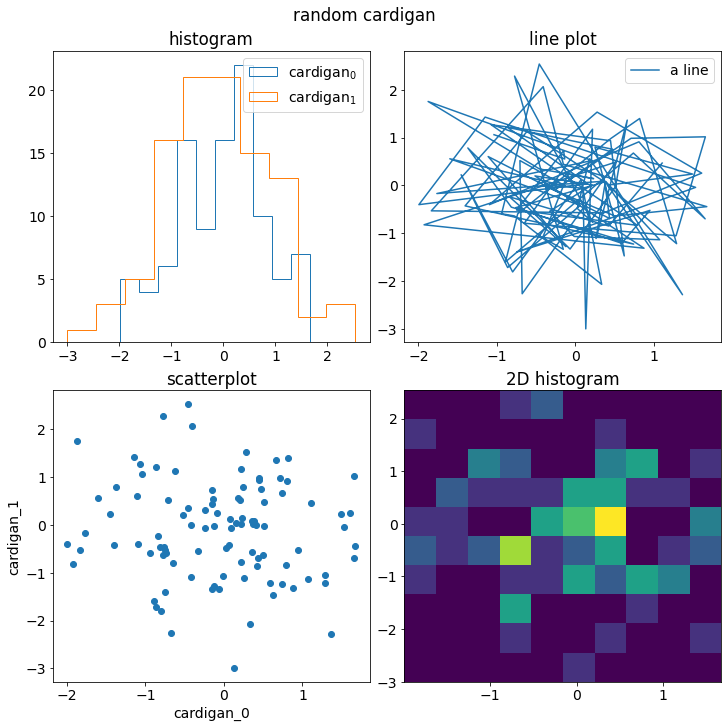

In [59]:
# line plot
plt.rcParams.update({'font.size': 14}) # <-- this will impact all figures (go up and re-run the vector plots)
cardigan = np.random.randn(2, 100)

fig, axs = plt.subplots(2, 2, figsize=(10, 10), constrained_layout=True)
axs[0, 0].hist(cardigan[0], histtype="step", label="cardigan$_0$")
axs[0, 0].hist(cardigan[1], histtype="step", label="cardigan$_1$")
axs[0,0].set_title('histogram')
axs[1, 0].scatter(cardigan[0], cardigan[1])
axs[1, 0].set_xlabel("cardigan_0")
axs[1, 0].set_ylabel("cardigan_1")
axs[1,0].set_title('scatterplot')
axs[0, 1].plot(cardigan[0], cardigan[1],label="a line")
axs[0,1].set_title('line plot')
axs[1, 1].hist2d(cardigan[0], cardigan[1])
axs[1,1].set_title('2D histogram')
axs[0,0].legend()
axs[0,1].legend()
fig.suptitle('random cardigan')

fig.savefig(os.path.expanduser("~/giocomo_python_tutorial_plot_save_example.png"), dpi=100)
plt.show()

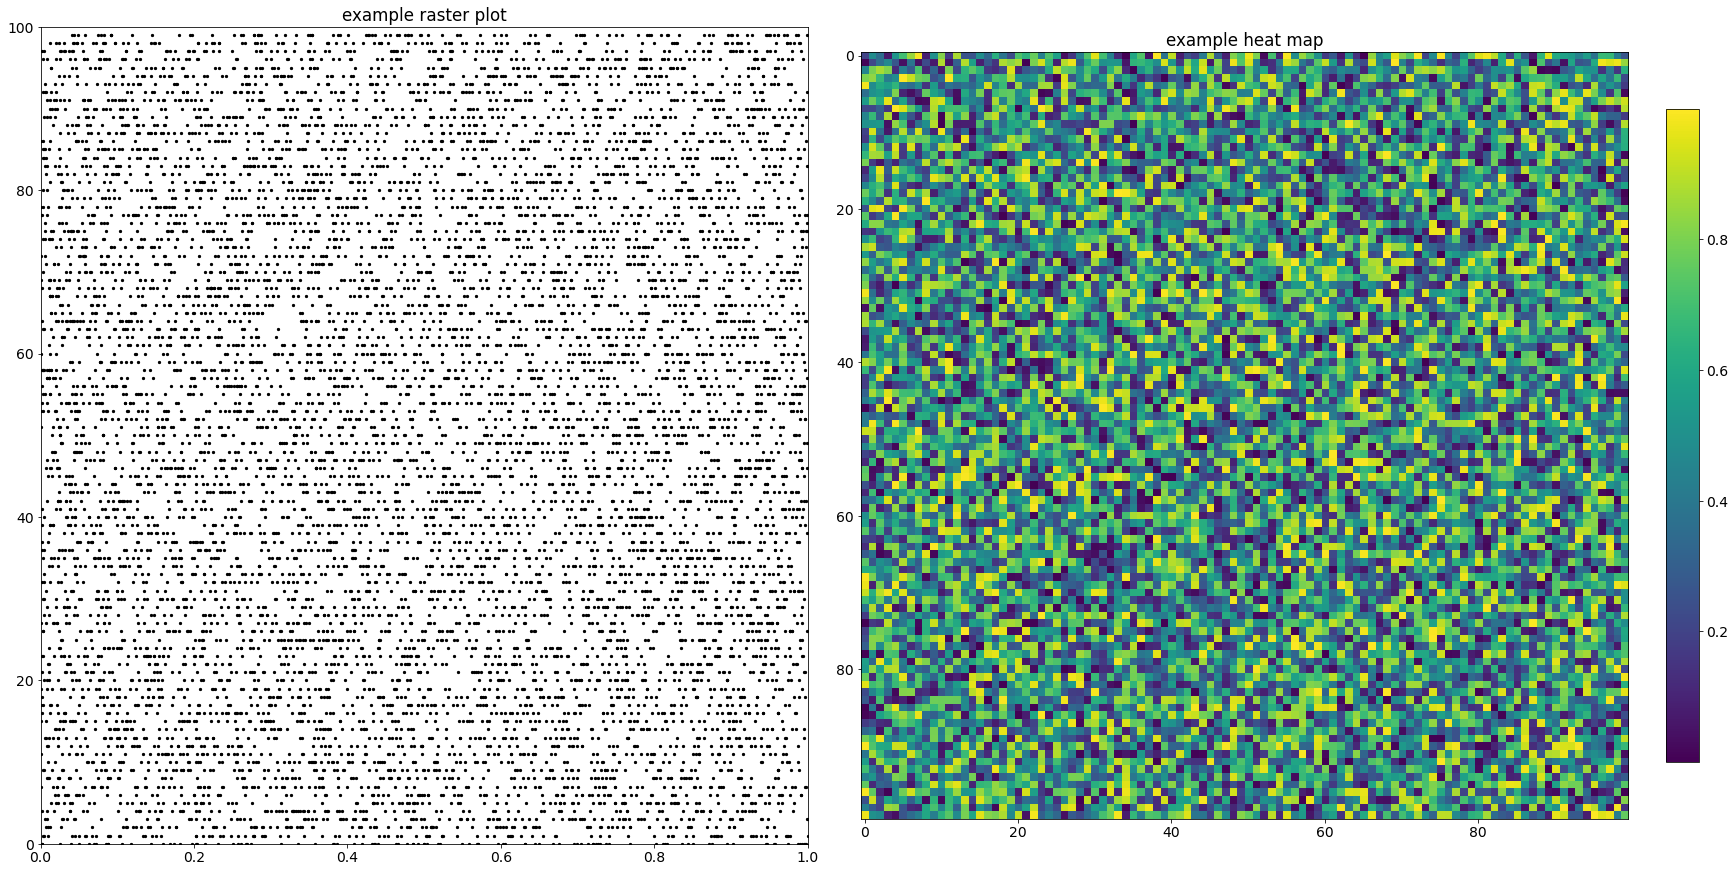

In [60]:
willow = npr.uniform(size=10000)
willow_sq = willow.reshape(100,100)
fig, ax = plt.subplots(1,2,figsize=(24,12), constrained_layout = True)
ax[0].set_title('example raster plot')
ax[0].set_xlim((0,1))
ax[0].set_ylim((0,100))
for i in range(100):
  ax[0].scatter(willow_sq[i,:],np.ones(100)*i,color='k',s=5)
  #scatter(x,y)

ax[1].set_title('example heat map')
exile = ax[1].imshow(willow_sq)
fig.colorbar(exile, ax=ax[1],shrink=0.8)